### Take grayscale image of size 512x512, add some salt & pepper noise and perform the following  operations – 
###  (b) Use different size of mask (3x3, 5x5, 7x7) with average filter for noise suppression and observe their performance in term of PSNR

In [3]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

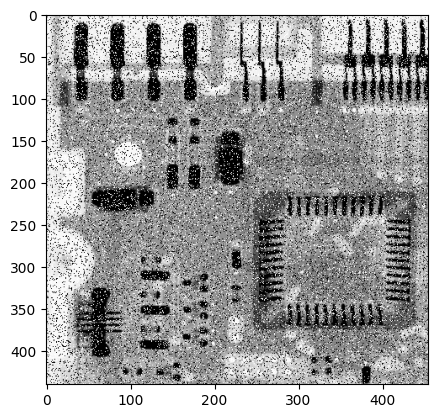

In [4]:
image = cv2.imread('./../../Images/Noisy PCB 455x440.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.show()

In [5]:
def filter(image, kernel_size, type = 'average'):
    if type == 'average':
        fn = np.mean
    elif type == 'median':
        fn = np.median

    kernel = np.ones(kernel_size)
    padx = kernel_size[0] // 2
    pady = kernel_size[1] // 2

    padded_image = np.zeros((image.shape[0]+2*padx, image.shape[1]+2*pady))
    padded_image[padx : image.shape[0]+padx, pady : image.shape[1]+pady] = image

    new_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            subsec = padded_image[i:i+kernel_size[0], j:j+kernel_size[1]]
            new_image[i,j] = fn(subsec*kernel)
    return new_image.astype(np.uint8)

In [11]:
def psnr(image, noisy_image):
    image = image.astype(np.float32)
    noisy_image = noisy_image.astype(np.float32)
    return 10 * np.log10(255**2/np.mean(np.pow(image-noisy_image, 2)))

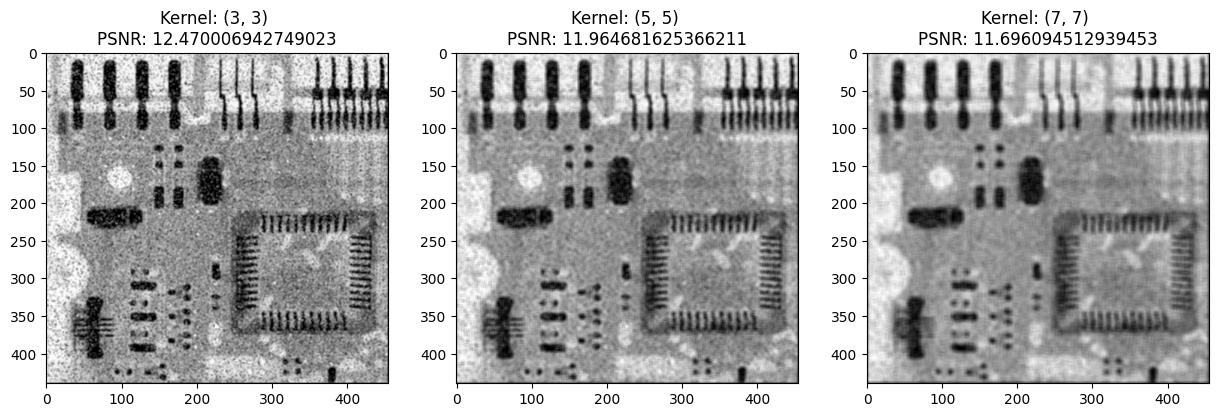

In [15]:
kernel_sizes = [(3,3), (5,5), (7,7)]

plt.figure(figsize=(15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    filtered_image = filter(image, kernel_sizes[i])
    psnr_val = psnr(image, filtered_image)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Kernel: {kernel_sizes[i]} \nPSNR: {psnr_val}')

plt.show()